# Perzeptron

## Theorie

Ein Perzeptron ist eine Art künstliches Neuron.

Es gibt eine Menge von Eingangsignalen **x** und eine Menge von Gewichtungen **w**. Dabei hat jeder Eingangswert x ein bestimmtes Gewicht w.
Zusammen ergeben die Eingsangsignale **x** und die Gewichtungen **w** eine Nettoeingabefunktion der Form:

z = w1 * x1+ ... +xn * wn 

z = **w**<sup>T</sup>**x**

Eine Aktivierungsfunktion nimmt die Nettoeingabefunktion auf --> Φ(z). Wenn die Aktivierungsfunktion eines bestimmten Objekts einen Schwellenwert Q überschreitet wird die Klasse +1 vorhergesagt, ansonsten wird die Klasse -1 vorhergesagt.

Beim Perzeptron ist die Aktivierungsfunktion Φ(z) eine Sprungfunktion:

Φ(z) = { 1 wenn z ≥ Q , 0 wenn z < Q }

### Perzeptron Lernregel

* Gewichtungen **w** mit kleinen Werten oder 0 initialisiert
* Für jedes Objekt **x**<sup>i</sup> folgende Schritte:
    * Berechnung des Ausgabewertes ŷ
    * Aktualisierung der Gewichtungen **w**

Der Wert der Aktualisierung eines Elements ∆w <sub>j</sub> berechnet sich anhand der sogenannten Perzeptron-Lernregel.

∆w <sub>j</sub> = η (y<sup>i</sup> - ŷ<sup>i</sup>) x<sub>j</sub><sup>i</sup>

* η = Lernrate (0,0... 1,0)
* y<sup>i</sup> = tatsächliche Klassenbezeichnung des i-ten Trainingsobjekts
* ŷ<sup>i</sup> = vorhergesagte Klassenbezeichnung des i-ten Trainingsobjekts
* x<sub>j</sub><sup>i</sup> = j-tes Elements des i-ten Trainingsobjektes

Der Gewichtungsvektor wird erst dann aktualisiert wenn alle Gewichtungsänderungen ∆w <sub>j</sub> berechnet wurden

<img src ="perceptron.jpg">

# Beispiel am Iris Datensatz


In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()

## Preprocessing

Wir wollen den Datensatz in einen pandas Dataframe umwandeln und untersuchen ob Daten fehlen oder nicht numerische Daten vorliegen etc.

In [3]:
X = pd.DataFrame(iris.data)
X.columns = ['sepal_len', 'sepal_width','petal_len','petal_width'] #insert column title
X['class'] = iris.target
X.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X.shape

(150, 5)

In [5]:
#check for missing values, if there are any we will print how many and in witch column
missing_cols = [col for col in X.columns if X[col].isnull().sum() > 0]
missing = []
namemissing = []

for col in X.columns:
    if X[col].isnull().sum() > 0:
        missing.append(X[col].isnull().sum())
for col in range(0, len(missing)):
    namemissing.append(missing_cols[col])
    print(missing_cols[col], 'missing values: ',missing[col])
print('\n', len(missing),' columns have missing values.\n')


 0  columns have missing values.



In [6]:
object_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
print('categorial columns: ', len(object_cols))
numeric_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print('numerical columns: ', len(numeric_cols))

categorial columns:  0
numerical columns:  4


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Die Untersuchung des Datensatzes zeigt , dass wir einen Datensatz mit 150 Objekten und jeweils 4 Merkmalen ('sepal_len', 'sepal_width','petal_len','petal_width') haben. Zudem haben wir 3 Zielklassen('setosa' 'versicolor' 'virginica').

In [8]:
X['class'] = X['class'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])

### Datenvisualisierung

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

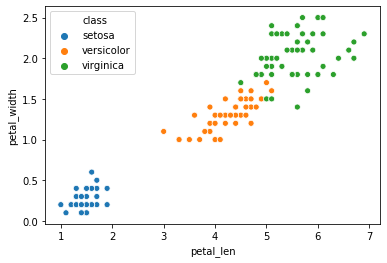

In [10]:
sns.scatterplot(data=X, x="petal_len", y="petal_width", hue=X['class'])

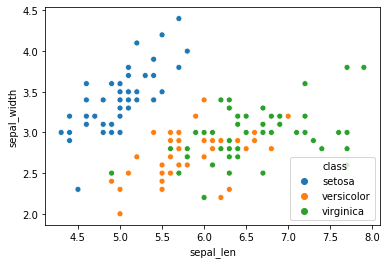

In [11]:
sns.scatterplot(data=X, x="sepal_len", y="sepal_width", hue=X['class'])

Anhand der Visualisierung ist festzustellen, dass die Klassen anhand der Merkmale zu unterscheiden sind. Besonders die setosa Klasse ist optisch gut von den anderen Klassen abgegrenzt.

## Model und Auswertung

Wir wollen unsere Spalte mit den Zielklassen (target) aus dem DataFrame entfernen und stattdessen in einer Series abspeichern.

In [12]:
y = X['class']
X.drop('class', axis =1, inplace=True)

Nun teilen wir die Daten in Test- und Trainingsdaten auf

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

Außerdem importieren wir das Modell, welches wir verwenden wollen. In diesem Fall Perceptron

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
max_iter = 30
scores = []
for n_iter in range(1,max_iter):                # this loop is not an effective way to sace the scores
    model = Perceptron(max_iter = n_iter)       # for now we use the default parameters
    model.fit(X_train, y_train);
    scores.append(model.score(X,y));

C:\Users\hubsc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hubsc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hubsc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hubsc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hubsc\Anaconda3\lib\site-packages\s

In [16]:
model.fit(X_train, y_train);
model.score(X_train, y_train)

0.95

Um zu verstehen wie unser Perceptron eine Klassifizierung vornimmt, werden wir die Genauigkeit über die Epochen visualisieren

[Text(0, 0.5, 'score'), Text(0.5, 0, 'epochs')]

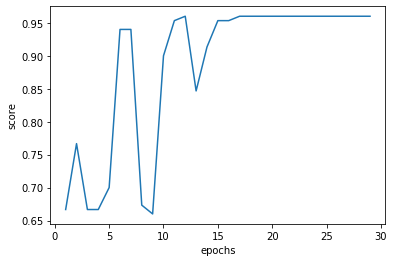

In [17]:
fig = sns.lineplot(x = range(1, max_iter), y = scores)
fig.set(xlabel = 'epochs',ylabel = 'score')

In [18]:
predictions = model.predict(X_valid)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_valid)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Unser Modell hat auf der Trainingsdatenmenge eine Genauigkeit von etwa 95%. Auf unser Validierungsdatenmenge macht der Algorithmus keine Fehler. Dies ist jedoch nur zufällig und vor allem der kleinen Validierungsdatenmenge geschuldet.